# CIS 545 Homework 5: Deep Learning with Pytorch

### Due Monday Dec 5th, 10:00 PM EST

Welcome to CIS 545 Homework 5! 

In this homework, we will learn more about Deep Learning, which Stanford CS professor Andrew Ng deemed to be the 'new electricity'. Deep learning has been used to solve a multitude of problems in various fields such as computer vision and natural language processing.

There are many cool frameworks for building deep learning models - PyTorch, Tensorflow, Theano, MxNet, and more! Almost all of these frameworks have multi-gpu support built-in. In this assignment, we will be building neural networks in PyTorch to solve an interesting classification problem.



![alt text](http://4.bp.blogspot.com/-sLgBLS3bJO8/U__Kx6PnkRI/AAAAAAAAAWM/Gz3cL5jiwTo/s320/godeeper.jpg)





## Why deep learning? 


*   It's coooool
*   Everyone is talking about deep learning these days! People like Siraj Raval can teach it in 5 mins (Check out his youtube channel for some comedy)
*    Deep learning unlocks the treasure trove of unstructured big data for those with the imagination to use it
*   Deep learning models have great representational power and are 'universal approximators'


### Deep Learning Applications:


Deep learning has been significantly improved voice command systems (such as Siri and Alexa), as well as healthcare and image identification.

Deep learning has applications across numerous industries, which is why experts consider deep learning to be the future of almost everything. 

**Examples of deep learning:**

Neural network detecting anomalies in Chest Xrays :




![alt text](https://imgur.com/HKPzrzP.jpg)

Most humans can't tell that this is a case of Pleural Effusion (sounds like medical jargon to engineers like us) but this Neural Network model can detect it very well!

Mask RCNNs in action for detecting objects on the road aiding a self driving vehicle's driving: 
![alt text](https://miro.medium.com/max/3864/1*O4wsvh0CHWjP6IrK9HI_Zg.png)

Pretty cool, right? We will be appling CNNs to solve a cool image classification problem.


# Libraries and Setup Jargon
Run the following cells to set up the notebook.


Please make sure you enter your **8 digit Penn ID** in the  student ID field below.

In [1]:
%%capture
!pip install -i https://test.pypi.org/simple/ penn-grader==0.5.0
from penngrader.grader import *

#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 14703644       # YOUR PENN-ID GOES HERE AS AN INTEGER

In [2]:
%%writefile config.yaml
grader_api_url: 'https://wyv616tp17.execute-api.us-east-1.amazonaws.com/default/Grader'
grader_api_key: 'Kd32fl3g3p917iM0zwjiO23Bitj4PO9ga4LektOa'

Overwriting config.yaml


In [3]:
grader = PennGrader('config.yaml', 'CIS_5450_Fall22_HW5', STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 14703644

Make sure this correct or we will not be able to store your grade


## Import the required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from collections import Counter
from PIL import Image
from skimage import io, transform
import os
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from google.colab import drive

## Set up GPU capabilities

The cell below sets up a CUDA device to use with torch, if available to you.

**Remeber to turn on the GPU for runtime in Colab**
*   Go to Runtime -> Change runtime type --> GPU


Note that you can create a PyTorch tensor `T` that resides on the GPU using the command `T = torch.Tensor(..., device=cuda)`. 
You can also copy existing tensors to the GPU with the command `T = T.to(device)` (make sure to overwrite `T` with the result of this function call). If you do not have a GPU, these commands will still work.

In [5]:
# DO NOT MODIFY
torch.manual_seed(42) # For grading consistency
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

1.12.1+cu113
cuda:0


# **Part 1:** Data Preprocessing and Preparation for Modeling in `PyTorch`

In this homework we will tackle the problem of classifying images.

Specifically, we would be looking at the CIFAR-10 dataset.

![Screen Shot 2565-11-20 at 15.41.04.png](https://s2.loli.net/2022/11/21/cseQkbxzPS7GmTE.png)

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 

There are 50000 training images and 10000 test images.

We would be using this dataset to train 3 different models:

1.   Logistic Regression
2.   Fully Connected Neural Network
3.   Convolutional Neural Network

And analyze the difference between these models by looking at the test accuracy.



## 1.1 Pytorch Dataset and DataLoader (10 points)

To keep data loading consistent across different models, PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data.

`Dataset` stores the samples and their corresponding labels. And `DataLoader` wraps an iterable around the Dataset to enable easy access to the samples.

While Pytorch provides Dataset and Dataloader for some popular datasets (such as Titanic), often of the time we need to define our own Custom Dataset to process our dataset.

![Screen Shot 2565-11-20 at 15.59.54.png](https://s2.loli.net/2022/11/21/7tGzmxKIvsOk8S5.png)

Dataset Class is defined with 3 compoenents:

1.   __init__
2.   __len__ so that len(dataset) returns the size of the dataset.
3.   __getitem__ to support the indexing such that `dataset[i]` can be used to get `i`ith sample (in our case Image, label pair).

To create a Custom Dataset, you would need overide above functions.

Documentation for creating custom dataset can be found [here](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

In this assignment, we would be using a **predefined Dataset from Pytorch**. (Since CIFAR-10 is a classic image dataset).

Complete the missing code in the two sections below.

*   1.1.1 Instantiate Train and Test Dataset.
*   1.1.2 Instantiate Train and Test Dataloader.


### 1.1.1 Instantiate Dataset (for train/test dataset) (6 points)

One optional function in Dataset class is `transform`, where we can apply a transformation to the dataset before we load them as a dataloader. For example if we define a `Resize` function in transform, all of our dataset(images) would be resized.

Below, complete the code to apply following transformations (in order!!):

1.   Resize the image to 32 by 32 (given as scale variable)
2.   Convert the Images to Tensor
3.   Normalize the Tensor using, the means `[0.485, 0.456, 0.406]` and standard deviations `[0.229, 0.224, 0.225]`

Please review the [Recitation 10 notebook](https://drive.google.com/file/d/1-twF9vLkQ8oDT1Ps6bqCGn_VdwXWTsZd/view?usp=sharing) for detailed instructions on how to perform these operations. 

Please compose this sequence of transformations using `transforms.Compose`, and save the result of this transformation sequence with the variable name `transform`. We highly recommend reading the [PyTorch documentation](https://pytorch.org/vision/stable/transforms.html) for this function before proceeding.

You might be asking, why we are using these two lists `[0.485, 0.456, 0.406]` and `[0.229, 0.224, 0.225]` to normalize the tensor? These two lists are the mean and the standard deviation of each dimension in the [ImageNet](https://www.image-net.org/index.php) dataset respectively. ImageNet has a total of 14,197,122 Images, and Pytorch often uses these values to normalize image data.



In [6]:
scale = 32
# TODO
transform = transforms.Compose(
        [transforms.Resize((scale, scale)),
         transforms.ToTensor(),
         transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225] )
         ])

# TODO END

Now that we have defined the tranforms we are going to apply to the dataset, let's instantiate both `trainDataset` and `testDataset` using our predefined PyTorch Dataset. Please refer to the documentation [here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10).


In [7]:
# TODO
train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
# TODO END

Files already downloaded and verified
Files already downloaded and verified


In [8]:
#Grader Cell (6 points)
transforms_list = []
for i in range(len(train_dataset.transform.transforms)):
  transforms_list.append(str(train_dataset.transform.transforms[i]))
grader.grade(test_case_id = 'instantiate_dataset', answer = (transforms_list, len(train_dataset), len(test_dataset)))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.1.2 Dataloader - Train / Test (4 points)

Now that we have `trainDataset` and `testDataset`, let's create dataloaders using these two datasets.

You can load the dataset into dataloaders using the `DataLoaders` object. Please refer to the documentation [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). 

Please save the respective dataloaders for `trainDataset` and `testDataset` as `train_loader` and `test_loader` respectively. 

For both `train_loader` and `test_loader`, set the `batch_size` equal to the previously-defined variable `batch`, set `shuffle` to `True`, and `num_workers` as 0.

For grading purposes, please save the code you used to load the dataset to dataloader as a string. Please keep the provided format of the string (don't change the spacing), and also keep the other arguments as default values.

In [9]:
batch = 64
# TODO
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch, shuffle=True, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=batch, shuffle=True, num_workers = 0)
# TODO END

In [10]:
# TODO
str_train_loader = "DataLoader(train_dataset, batch_size = batch, shuffle = True, num_workers = 0)"
str_test_loader = "DataLoader(test_dataset, batch_size = batch, shuffle = True, num_workers = 0)"
# END TODO

In [11]:
#Grader Cell (4 points)
grader.grade(test_case_id = 'check_dataloader', answer = (str_train_loader, str_test_loader))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.2 Summarizing our Dataset (13 points)

When implementing ML applications, getting a good sense of the dataset we are working on is always the first step you should take.

### 1.2.1 Looking at the distribution of labels (6 points)

1. Get the number of labels in training dataset and save this quantity as the variable `train_num_labels`. 

2. Create a dictionary `train_dataset_dict` that contains the labels as keys and the number of images inside the label as values.

3. Create a `DataLoader` called `train_loader_bar_plot` which takes as arguments the `train_dataset`, with the `batch_size` equal to the length of the `train_dataset`. 

Moreover, please repeat the above 3 steps for the test dataset. Please call the variables for each step `test_num_labels`, `test_num_labels` and `test_loader_bar_plot` respectively. 

In [12]:
print(train_dataset[1])

(tensor([[[ 0.5193,  0.0398, -0.3198,  ..., -0.5596, -0.6281, -0.7650],
         [ 0.2796,  0.3652,  0.0227,  ..., -0.4739, -0.7993, -0.9020],
         [ 0.2796,  0.2624, -0.1486,  ..., -0.7650, -0.9534, -0.9705],
         ...,
         [ 0.8789,  0.5536,  0.5193,  ..., -1.3987, -1.0733, -0.5253],
         [ 0.7077,  0.5536,  0.6049,  ..., -0.3541, -0.0116,  0.1254],
         [ 0.6734,  0.5878,  0.6734,  ...,  0.3309,  0.3309,  0.3309]],

        [[ 1.0630,  0.3627, -0.2150,  ..., -0.3725, -0.4601, -0.6176],
         [ 0.7654,  0.6429,  0.1527,  ..., -0.3025, -0.6352, -0.7577],
         [ 0.6779,  0.5203, -0.0224,  ..., -0.6001, -0.8102, -0.8277],
         ...,
         [ 0.8880,  0.6604,  0.7654,  ..., -1.4405, -1.1078, -0.5826],
         [ 0.6604,  0.6254,  0.7829,  ..., -0.4076, -0.0399,  0.0826],
         [ 0.5553,  0.5553,  0.6954,  ...,  0.2927,  0.3102,  0.2927]],

        [[ 1.4548,  0.5659, -0.1487,  ..., -0.5670, -0.5670, -0.5844],
         [ 1.1411,  0.8797,  0.2522,  ..., -

In [13]:
# TODO - TRAIN

train_num_labels = 0
train_dataset_dict = {}

for inputs, labels in train_dataset:
  if labels not in train_dataset_dict:
    train_dataset_dict[labels] = 0
    train_num_labels += 1

  train_dataset_dict[labels] +=  1
    
    
print(train_dataset_dict)
print(train_num_labels)


train_loader_bar_plot = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset))
# END TODO

{6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000}
10


In [14]:
# TODO - TEST
test_num_labels = 0
test_dataset_dict = {}

for inputs, labels in test_dataset:
  if labels not in test_dataset_dict:
    test_dataset_dict[labels] = 0
    test_num_labels += 1

  test_dataset_dict[labels] +=  1
    
print(test_dataset_dict)
print(test_num_labels)   
    
test_loader_bar_plot = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset))
# END TODO

{3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000}
10


In [15]:
#Grader Cell (6 points)
grader.grade(test_case_id = 'dataset_dict', answer = (train_num_labels, train_dataset_dict, test_num_labels, test_dataset_dict))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2.2 Visualize through bar charts (2 points - Manual Grading)
Please create a barplot for the distributions of the train/test dataset using MatPlotLib or Seaborn.

y-axis: Number of data points

x-axis: The integer value of the labels in the CIFAR dataset 

Please provide appropriate titles and axis labels for the plot.

[Text(0.5, 1.0, 'Train dataset label frequency')]

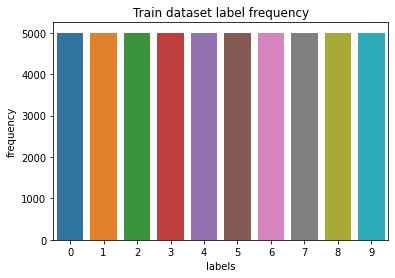

In [16]:
# TODO: Create a barplot showing the distribution of the dataset
# TRAIN
keys = list(train_dataset_dict.keys())
vals = list(train_dataset_dict.values())
p = sns.barplot(x=keys, y=vals)

p.set_xlabel("labels", fontsize = 10)
p.set_ylabel("frequency", fontsize = 10)
p.set(title='Train dataset label frequency')

[Text(0.5, 1.0, 'Test dataset label frequency')]

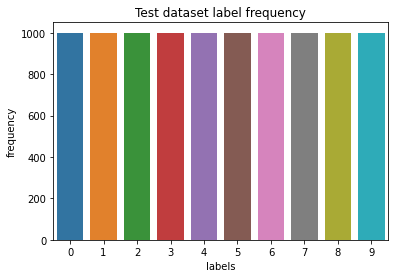

In [17]:
# TODO: Create a barplot showing the distribution of the dataset
# TEST
keys = list(test_dataset_dict.keys())
vals = list(test_dataset_dict.values())
p = sns.barplot(x=keys, y=vals)

p.set_xlabel("labels", fontsize = 10)
p.set_ylabel("frequency", fontsize = 10)
p.set(title='Test dataset label frequency')

### 1.2.3 Visualize the Training Dataset! (5 points - Manual Grading)

Since everything tends to make more sense when one could literally see it, we ask you to visualize the images in the `train_dataset` given a fixed set of indices.  

These are the TODOs for this question:
* Since the `train_dataset` we defined above is already normalized, please create another Torch dataset called `train_dataset_for_plot` where the normalization transforms are not performed. That is, only call the `resize` and `toTensor` functions when defining the series of transformations `transform_for_plot` that will be applied to this dataset. 

* Then, loop through `sample_idxs` (the list of indices provided) using a for-loop
* For each iteration of this for-loop:
  * Plot the current image using matplotlib
  * When plotting the image, print the integer-valued label of the image using `plt.title`
  * When plotting the image, make sure to hide grid lines


Files already downloaded and verified


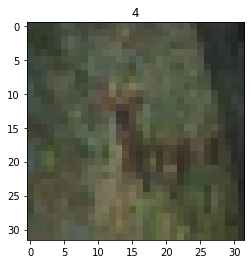

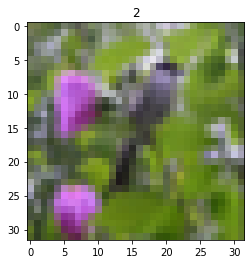

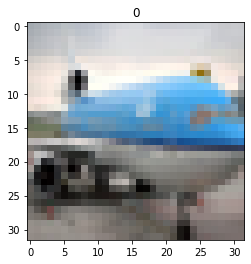

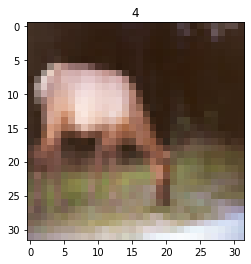

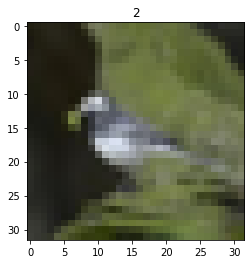

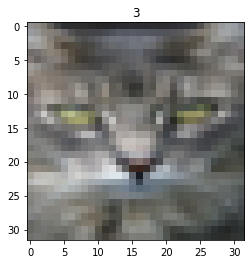

In [18]:
torch.manual_seed(42)

# TODO
transform_for_plot = transforms.Compose(
        [transforms.Resize((scale, scale)),
         transforms.ToTensor()
         ])


train_dataset_for_plot = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform_for_plot)
# END TODO

sample_idxs = [10, 300, 700, 2705, 5005, 8000] # DO NOT MODIFY

# TODO
def imshow(img, labels):
    npimg = img.numpy()
    plt.imshow(img.permute(1, 2, 0))
    plt.grid(False)
    plt.title(labels)
    plt.show()

for index in sample_idxs: 
  image, labels = train_dataset_for_plot[index]
  imshow(image, labels)


# END TODO
#def imshow(img):
#    npimg = img.numpy()
#    plt.imshow(img.permute(1, 2, 0))
#    plt.show()

# get some random training images
#data_iter = iter(train_loader)
#images, labels = data_iter.next()

# show images
#imshow(torchvision.utils.make_grid(images))

# **Part 2:** Classification Models

We now have the data needed to train a multi-class object classifier. We will start simple with a logistic regression classifier as a baseline for our performance, before we move onto more complex neural networks. 

## 2.1 Logical Logistic Regression - Baseline (18 points)

Let's first try solving this problem with a Logistic Regression classifier.

We will define a logistic regression model in Pytorch and train it on our training set and evaluate the performance on the test set.

### 2.1.1 Logistic Regression Model Architecture (7 points)

We will define our first model in Pytorch. Read up about how to define and use layers in a Pytorch neural network [here](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html). 

Our first model is a logistic regression model with the number of outputs equal to the number of classes in the model. Please implement the constructor for the `LogReg` class (the `__init__` function below) with the definition of the logistic regression model.

Please review the [notebook *and* recording of Recitation 10](https://edstem.org/us/courses/24593/discussion/2179813) for a detailed discussion of how to perform this process, especially how to call the function `nn.Flatten()` when defining the model.

When implementing this section, please think about what activation function would be most appropriate for logistic regression.

In [19]:
for inputs, labels in train_loader:
    print("The shape of inputs is:", inputs.shape)
    print("The shape of labels is:", labels.shape)
    break

The shape of inputs is: torch.Size([64, 3, 32, 32])
The shape of labels is: torch.Size([64])


In [20]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO
        self.flatten = nn.Flatten(start_dim=1)
        self.linear=torch.nn.Linear(in_features = 3 *32 * 32, out_features = 10)
        self.sigmoid = nn.Sigmoid()
        
        # END TODO

    def forward(self, x):
        # TODO
       outputs = self.linear(self.flatten(x))
       outputs = self.sigmoid(outputs)
       return outputs
        
      
        # END TODO


Also, let's print the model summary out by running the cell below:

In [21]:
LogReg()

LogReg(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=3072, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)

In [22]:
#Grader Cell (7 points)
grader.grade(test_case_id = 'logistic_regression_model', answer = str(LogReg()))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.1.2 Training Logistic Regression Model

TODOs
1.   Instantiate the Logistic regression to the variable `logreg`. Make sure to send this to the GPU device -- please consult the [Module 20 slides](https://docs.google.com/presentation/d/1pw9cFO30U_kI47JUZIW9COLAkM8BE8wr/edit?usp=sharing&ouid=115607071793138372214&rtpof=true&sd=true) for a primer on how to do this.

2.   Set the loss criterion as `CrossEntropyLoss` (you can look up the documentation [here](https://pytorch.org/docs/stable/nn.html#loss-functions)). Note that softmax is already built into CrossEntropyLoss so if you use CrossEntropyLoss as the loss criterion, you don't need to add an additional softmax layer. 

3.   Fill in the missing parts in the training loop (see `#TODO` comments below)
4.   Save the Training Accuracy for every epoch into the variable `acc_LIST_log`.
5.   Save the Average Loss for every epoch into the variable `loss_LIST_log`.

The optimizer is set as Adam -- **please do not modify the optimizer**.

Hint: Remember to update the weights correctly by backpropagation, please zero out the gradients by calling `optimizer.zero_grad()` every time you call `backward()`.  **Please review the [Recitation 10 notebook](https://drive.google.com/file/d/1-twF9vLkQ8oDT1Ps6bqCGn_VdwXWTsZd/view?usp=sharing) for detailed instructions on how to perform these operations.**

**Note: If the loss went up during the training, there is something wrong with the model, so you should check if the model is implemented correctly**

In [23]:
%%time
# Sending the data to device (CPU or GPU)
# TODO
logreg = LogReg().to(device)
criterion = nn.CrossEntropyLoss()
# END TODO
optimizer = optim.Adam(logreg.parameters(), lr=1e-4) #lr - learning step
epoch = 25

loss_LIST_log = []
acc_LIST_log = []

# Train the Logistic Regression
for epoch in range(epoch):
  running_loss = 0.0
  correct = 0
  total = 0
  for inputs, labels in train_loader:
      labels = labels.type(torch.LongTensor) # Cast to Float
      inputs, labels = inputs.to(device), labels.to(device)
      
      # TODO: Complete the body of this for-loop
      outputs = logreg(inputs) # Feed the network the train data
      optimizer.zero_grad() # We need to reset the optimizer tensor gradient every mini-batch
      loss = criterion(outputs, labels) # this is the average loss for one mini-batch of inputs
      loss.backward() # Do a back propagation
      optimizer.step() # Update the weight using the gradients from back propagation by learning step

      running_loss += loss.item() #get the accumulated loss for each epoch

    
      
      _, predicted = torch.max(outputs.data, 1) # use max to get the prediction
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  
  accuracy = 100 * correct / total
  acc_LIST_log.append(accuracy)
  loss_LIST_log.append(running_loss / len(train_loader) ) # get the avg loss for each epoch
  # END TODO   
  
  # print statistics
  print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(train_loader), accuracy))

The loss for Epoch 0 is: 2.0914223463943853, Accuracy = 32.428
The loss for Epoch 1 is: 2.0449691579469937, Accuracy = 35.726
The loss for Epoch 2 is: 2.0307566142448072, Accuracy = 36.608
The loss for Epoch 3 is: 2.0219370385874873, Accuracy = 36.924
The loss for Epoch 4 is: 2.015554020776773, Accuracy = 37.444
The loss for Epoch 5 is: 2.0103070563672447, Accuracy = 37.9
The loss for Epoch 6 is: 2.0059206921731114, Accuracy = 38.176
The loss for Epoch 7 is: 2.0019836805360702, Accuracy = 38.266
The loss for Epoch 8 is: 1.9989248181852843, Accuracy = 38.85
The loss for Epoch 9 is: 1.995709345011455, Accuracy = 38.888
The loss for Epoch 10 is: 1.9930897062391881, Accuracy = 39.112
The loss for Epoch 11 is: 1.990197228806098, Accuracy = 39.188
The loss for Epoch 12 is: 1.9882768496223118, Accuracy = 39.424
The loss for Epoch 13 is: 1.986011653147695, Accuracy = 39.522
The loss for Epoch 14 is: 1.9839610193696473, Accuracy = 39.67
The loss for Epoch 15 is: 1.981981398961733, Accuracy = 39

### 2.1.3 Plotting Training Accuracy vs Epochs for Logistic Regression (3 points - Manual)

Plot the training accuracy vs epochs on a line plot. The accuracy should be on the y-axis and the epoch number should be on the x-axis.

Please use appropriate figure title and axis labels for this plot.

Text(0.5, 1.0, 'Training Accuracy -LOGREG')

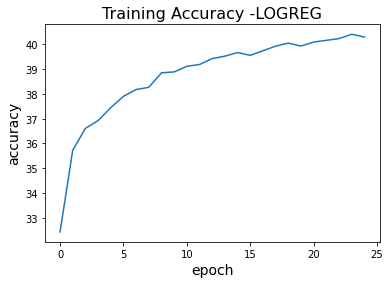

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO

plt.plot(acc_LIST_log)
plt.xlabel('epoch',fontsize = 14)
plt.ylabel('accuracy',fontsize = 14)
plt.title('Training Accuracy -LOGREG',fontsize = 16)

# END TODO 

### 2.1.4 Logistic Regression Model Accuracy and Loss (8 points)

Calculate the Test Accuracy for the Logistic Regression Model we trained above.

This should be similar to how we calculated training accuracy above -- please see the [Recitation 10 notebook](https://drive.google.com/file/d/1-twF9vLkQ8oDT1Ps6bqCGn_VdwXWTsZd/view?usp=sharing) for a discussion on how to do this.

In [25]:
# TODO
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        images, labels = images.to(device), labels.to(device)
        # TODO: complete the body of this for-loop
        outputs = logreg(images) # shape: torch.Size([10000, 10])
        _, predicted = torch.max(outputs.data, 1) # use max to get the prediction
        total += labels.size(0)
        correct += (predicted == labels).sum()
        # TODO END

test_acc_log = 100 * correct / total
print('Test Accuracy: ' + str(test_acc_log))

Test Accuracy: tensor(38.6700, device='cuda:0')


In [26]:
#Grader Cell (8 points)
grader.grade(test_case_id = 'logistic_regression_acc_loss', answer = (test_acc_log.item(), loss_LIST_log))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 2.2 Feedforward Neural Networks (23 points)

![Screen Shot 2565-11-20 at 16.03.22.png](https://s2.loli.net/2022/11/21/dvqstVUzcQPChD1.png)


Since logistic regression isn't that great at the classification problem above, we need more representation power in our model. We will now define a feedforward neural network.

Complete the *FNN* class below to define a feedforward neural network with at least 2 hidden layers. Note that the last layer must have the same number of classes as the output size! 

When implementing this model, please think about what activation function would be most appropriate for each layer in this classifier. 

### 2.2.1 Feedforward Neural Network Model Architecture (10 points)

In [27]:
class FNN(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO
        self.flatten = nn.Flatten(start_dim=1)
        self.layer1=torch.nn.Linear(in_features = 3 *32 * 32, out_features = 900)
        self.layer2=torch.nn.Linear(in_features = 900, out_features = 300)
        self.layer3=torch.nn.Linear(in_features = 300, out_features = 10)
        self.relu = nn.ReLU()
        # END TODO

    def forward(self, x):
        # TODO
        outputs = self.relu(self.layer2(self.relu(self.layer1(self.flatten(x)))))
        outputs = self.layer3(outputs)

        # END TODO
        return outputs

        
      

Let's print the model summary

In [28]:
FNN()

FNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=3072, out_features=900, bias=True)
  (layer2): Linear(in_features=900, out_features=300, bias=True)
  (layer3): Linear(in_features=300, out_features=10, bias=True)
  (relu): ReLU()
)

In [29]:
#Grader Cell (10 points)
grader.grade(test_case_id = 'feedforward_nn_model', answer = str(FNN()))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.2.2 Training FNN Model

TODOs
1.   Instantiate the FNN to the variable `fnn` (make sure to send this to the device env)
2.   Set the loss criterion to be `CrossEntropyLoss` (you can look up the documentation [here](https://pytorch.org/docs/stable/nn.html#loss-functions))
3.   Fill in the missing parts in the training loop below.
4.   Save the Training Accuracy for every epoch into `acc_LIST_FNN`
5.   Save the Average Loss for every epoch into `loss_LIST_FNN`

The optimizer is set as Adam -- **please do not modify the optimizer**.

Hint: Remember to update the weights correctly by backpropagation, please zero out the gradients by calling `optimizer.zero_grad()` every time you call `backward()`.  **Please review the [Recitation 10 notebook](https://drive.google.com/file/d/1-twF9vLkQ8oDT1Ps6bqCGn_VdwXWTsZd/view?usp=sharing) for detailed instructions on how to perform these operations.**

**Note: If the loss went up during the training, there is something wrong with the model, so you should check if the model is implemented correctly**

In [30]:
%%time
# Sending the data to device (CPU or GPU)
# TODO
fnn = FNN().to(device)
criterion = nn.CrossEntropyLoss()
# END TODO 
optimizer = optim.Adam(fnn.parameters(), lr=1e-4) #lr - learning step
epoch = 25

acc_LIST_FNN = []
loss_LIST_FNN = []

# Train the FNN
for epoch in range(epoch):
  running_loss = 0.0
  correct = 0
  total = 0
  for inputs, labels in train_loader:
      labels = labels.type(torch.LongTensor) # Cast to Long
      inputs, labels = inputs.to(device), labels.to(device)
      
      # TODO
      outputs = fnn(inputs) # Feed the network the train data
      optimizer.zero_grad() # We need to reset the optimizer tensor gradient every mini-batch
      loss = criterion(outputs, labels) # this is the average loss for one mini-batch of inputs
      loss.backward() # Do a back propagation
      optimizer.step() # Update the weight using the gradients from back propagation by learning step

      running_loss += loss.item() #get the accumulated loss for each epoch

    
      
      _, predicted = torch.max(outputs.data, 1) # use max to get the prediction
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  
     

  accuracy =  100 * correct / total # Calculate Training Acc
  acc_LIST_FNN.append(accuracy)
  loss_LIST_FNN.append( running_loss / len(train_loader)) # get the avg loss for each epoch
  
  # END TODO 

  # print statistics
  print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(train_loader), accuracy))

The loss for Epoch 0 is: 1.637236881896358, Accuracy = 42.484
The loss for Epoch 1 is: 1.4109117821659274, Accuracy = 50.904
The loss for Epoch 2 is: 1.2962567409895875, Accuracy = 54.986
The loss for Epoch 3 is: 1.2069681691544136, Accuracy = 58.162
The loss for Epoch 4 is: 1.1268669182382276, Accuracy = 61.11
The loss for Epoch 5 is: 1.0495555605120062, Accuracy = 63.846
The loss for Epoch 6 is: 0.9835990178767983, Accuracy = 66.184
The loss for Epoch 7 is: 0.9142781383241229, Accuracy = 68.998
The loss for Epoch 8 is: 0.8497190736138912, Accuracy = 70.946
The loss for Epoch 9 is: 0.7831879156019986, Accuracy = 73.634
The loss for Epoch 10 is: 0.7209518538106738, Accuracy = 75.95
The loss for Epoch 11 is: 0.6663135227263736, Accuracy = 77.62
The loss for Epoch 12 is: 0.6066239978879919, Accuracy = 80.004
The loss for Epoch 13 is: 0.5538955669650032, Accuracy = 81.828
The loss for Epoch 14 is: 0.5035082557050469, Accuracy = 83.618
The loss for Epoch 15 is: 0.4560173734298448, Accuracy

### 2.2.3 Plotting Training Accuracy vs Epochs FNN (3 points - Manually Graded)

Plot the training accuracy vs epochs. The accuracy should be in the y-axis and epochs in x-axis.

Please set appropriate figure title and names for axis.

Text(0.5, 1.0, 'Training Accuracy - FNN')

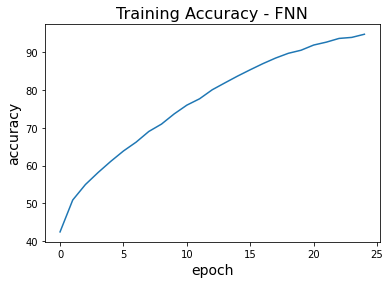

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO
plt.plot(acc_LIST_FNN)
plt.xlabel('epoch',fontsize = 14)
plt.ylabel('accuracy',fontsize = 14)
plt.title('Training Accuracy - FNN',fontsize = 16)

# END TODO 

### 2.2.4 FNN Model Accuracy and Loss (10 points)

Calculate the Test Accuracy for the FNN Model we trained above (the technique for doing this is the same as computing the test accuracy for the logistic regression classifier above). 

In [32]:

total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        images, labels = images.to(device), labels.to(device)
        # TODO: complete each iteration of the for-loop
        outputs = fnn(images) # shape: torch.Size([10000, 10])
        _, predicted = torch.max(outputs.data, 1) # use max to get the prediction
        total += labels.size(0)
        correct += (predicted == labels).sum()

test_acc_FNN = 100 * correct / total
# TODO END
print('Test Accuracy: ' + str(test_acc_FNN))

Test Accuracy: tensor(54.6200, device='cuda:0')


In [33]:
#Grader Cell (10 points)
grader.grade(test_case_id = 'feedforward_nn_acc_loss', answer = (test_acc_FNN.item(), loss_LIST_FNN))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 2.3 Convoluted Convolutional Neural Networks (26 points)

So, what are CNNs?

Convolutional Neural Networks are very similar to Feedforward Neural Networks from the previous section: they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other.

So what changes? ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

If you wanna know more about how CNNs function and see some cool visualizations, we would highly recommend [this](https://cs231n.github.io/convolutional-networks/) page

![Screen Shot 2565-11-20 at 16.01.53.png](https://s2.loli.net/2022/11/21/L6pUz2chXWRGn31.png)

We will define the architecture for the CNN we will be using. The components of a CNNs are as follows: 

*   Convolutional Layers
*   Pooling Layers
*   Linear Layers
*   Activation Functions

Define a CNN model with Pytorch that contains one or more layers, where each layer consists of a convolutional layer followed by an activation function and a max pool. (For this assignment, we discourage adding three or more layers.)

Then, flatten the output from the convolutional layers, and pass it through one or more fully connected or 'dense' layers and activation functions after all but the last layer. Note that the output shape from the last layer must be the same as the number of classes.

### 2.3.1 Convolutional Neural Network Model Architecture (12 points)

In [34]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: complete the constructor of the CNN class
        self.conv = nn.Conv2d(in_channels = 3, out_channels=20, kernel_size=2, padding = 1) # 20 * 33 * 33
        self.relu = nn.ReLU()
        self.mp = nn.MaxPool2d(kernel_size = 2, stride = 2) #20 * 16 * 16

        self.flatten = nn.Flatten(start_dim=1) 

        self.fc = nn.Linear(in_features = 20 * 16 * 16, out_features=2000)
        self.fc0 = nn.Linear(in_features = 2000, out_features=1000)
        self.fc1 = nn.Linear(in_features = 1000, out_features=500)
        self.fc2 = nn.Linear(in_features = 500, out_features=200)
        self.fc3 = nn.Linear(in_features = 200, out_features=10)
    
        # END TODO
    
    def forward(self, x):
        # TODO: Implement the forward() method of the CNN class
        outputs = self.mp(self.relu(self.conv(x)))
        outputs = self.flatten(outputs)
        #print(outputs.shape)
        outputs = self.fc3(self.relu(self.fc2(self.relu(self.fc1(self.relu(self.fc0(self.relu(self.fc(outputs)))))))))

        # END TODO
        return outputs

 

Let's print out the model summary

In [35]:
CNN()

CNN(
  (conv): Conv2d(3, 20, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=5120, out_features=2000, bias=True)
  (fc0): Linear(in_features=2000, out_features=1000, bias=True)
  (fc1): Linear(in_features=1000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

In [36]:
#Grader Cell (15 points)
grader.grade(test_case_id = 'cnn_model', answer = str(CNN()))

Correct! You earned 12/12 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.3.2 Training CNN Model

TODOs
1.   Instantiate the CNN to the variable `cnn` (make sure to send this to the device env)
2.   Set the criterion as a CrossEntropyLoss (you can look up the documentation [here](https://pytorch.org/docs/stable/nn.html#loss-functions))
3.   Fill in the missing parts in the training loop.
4.   Save the Training Accuracy for every epoch into `acc_LIST_CNN`
5.   Save the Average Loss for every epoch into `loss_LIST_CNN`

The optimizer is set as Adam -- **please do not modify the optimizer**.

Hint: Remember to update the weights correctly by backpropagation, please zero out the gradients by calling `optimizer.zero_grad()` every time you call `backward()`.  **Please review the [Recitation 10 notebook](https://drive.google.com/file/d/1-twF9vLkQ8oDT1Ps6bqCGn_VdwXWTsZd/view?usp=sharing) for detailed instructions on how to perform these operations.**

**Note: If the loss went up during the training, there is something wrong with the model, so you should check if the model is implemented correctly**

In [37]:
%%time
# Sending the data to device (CPU or GPU)
# TODO
cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
# END TODO
optimizer = optim.Adam(cnn.parameters(), lr=1e-4) #lr - learning step
epoch = 25

acc_LIST_CNN = []
loss_LIST_CNN = []

# Train the CNN
for epoch in range(epoch):
  running_loss = 0.0
  correct = 0
  total = 0
  for inputs, labels in train_loader:
      labels = labels.type(torch.LongTensor) # Cast to Float
      inputs, labels = inputs.to(device), labels.to(device)
      # TODO: complete the body of this for-loop
      outputs = cnn(inputs) # Feed the network the train data
      optimizer.zero_grad() # We need to reset the optimizer tensor gradient every mini-batch
      loss = criterion(outputs, labels) # this is the average loss for one mini-batch of inputs
      loss.backward() # Do a back propagation
      optimizer.step() # Update the weight using the gradients from back propagation by learning step

      running_loss += loss.item() #get the accumulated loss for each epoch

      _, predicted = torch.max(outputs.data, 1) # use max to get the prediction
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  
      
  accuracy = 100 * correct / total # Calculate Trining Acc
  acc_LIST_CNN.append(accuracy)
  loss_LIST_CNN.append(running_loss / len(train_loader)) # get the avg loss for each epoch
  
  # END TODO
  # print statistics
  print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(train_loader), accuracy))

The loss for Epoch 0 is: 1.6028024433823802, Accuracy = 41.762
The loss for Epoch 1 is: 1.2617659544395974, Accuracy = 54.562
The loss for Epoch 2 is: 1.1134731561479057, Accuracy = 60.102
The loss for Epoch 3 is: 0.9917189202192799, Accuracy = 64.604
The loss for Epoch 4 is: 0.888085673265445, Accuracy = 68.432
The loss for Epoch 5 is: 0.7926176243730824, Accuracy = 71.936
The loss for Epoch 6 is: 0.6982777181946104, Accuracy = 75.36
The loss for Epoch 7 is: 0.6044654017290496, Accuracy = 78.672
The loss for Epoch 8 is: 0.5072143393404344, Accuracy = 82.388
The loss for Epoch 9 is: 0.41525959991433126, Accuracy = 85.534
The loss for Epoch 10 is: 0.33562518767726696, Accuracy = 88.392
The loss for Epoch 11 is: 0.2684143930006668, Accuracy = 90.688
The loss for Epoch 12 is: 0.20922080464089465, Accuracy = 92.706
The loss for Epoch 13 is: 0.165375187488087, Accuracy = 94.352
The loss for Epoch 14 is: 0.13440180089696288, Accuracy = 95.36
The loss for Epoch 15 is: 0.11769793442476664, Acc

### 2.3.3 Plotting Training Accuracy vs Epochs CNN (4 points - Manually Graded)

Plot the training accuracy vs epochs. The accuracy should be in the y-axis and epochs in x-axis.

Please set appropriate figure title and names for axis.

Text(0.5, 1.0, 'Training Accuracy - CNN')

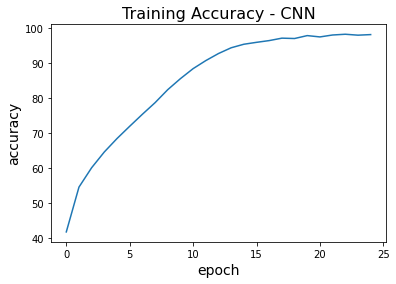

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO
plt.plot(acc_LIST_CNN)
plt.xlabel('epoch',fontsize = 14)
plt.ylabel('accuracy',fontsize = 14)
plt.title('Training Accuracy - CNN',fontsize = 16)

# END TODO 

### 2.3.4 CNN Model Accuracy and Loss (10 points)

Calculate the Test Accuracy for the CNN Model we trained above. The technique for doing this is the same as computing the test accuracy for the logistic regression and FFN classifiers above.

In [39]:
# TODO
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        labels = labels.type(torch.LongTensor) # Cast to Float
        images, labels = images.to(device), labels.to(device)
        # TODO
        outputs = cnn(images) # shape: torch.Size([10000, 10])
        _, predicted = torch.max(outputs.data, 1) # use max to get the prediction
        total += labels.size(0)
        correct += (predicted == labels).sum()

test_acc_CNN = 100 * correct / total
# END TODO
print(f'Test Accuracy: ' + str(test_acc_CNN))

Test Accuracy: tensor(66.1200, device='cuda:0')


In [40]:
#Grader Cell (10 points)
grader.grade(test_case_id = 'cnn_acc_loss', answer = (test_acc_CNN.item(), loss_LIST_CNN))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**From the test accuracies we can confirm that CNN works better than Logistic and FNN**

**This is due to the intrinsic structure of CNN, where it captures the semantic of the image**.

## 2.4 Confusion Matrix (10 points)

We want to give you some insight into how you can further analyze the performance of the classification model you have trained. 

Upto now we have only used accuracy as a measure of performance. Although accuracy is simple and widely used measure, there are drawbacks to using accuracy.

Assume that we are trying to train a model to detect a rare disease from CT images of patients. For simplicity, assume that this rare disease has an incidence rate of 1%.

In this situation, if we train a degenerative model which always predicts that the patient does not have the disease, the accuracy is very high, namely 99%! Obviously in this case, accuracy is not a good measure of performance of the model.

This example serves to motivate confusion matrices and related metrics.

A confusion matrix is defined to be $C \times C$ 2D matrix, where $C$ is number of distinct labels in the dataset. In this matrix, the rows represent the actual labels and the columns represent the predicted labels. 

The $(i, j)$-th entry of the confusion matrix contains the no. of data points where the actual label is $i$ but the model predicted $j$. 

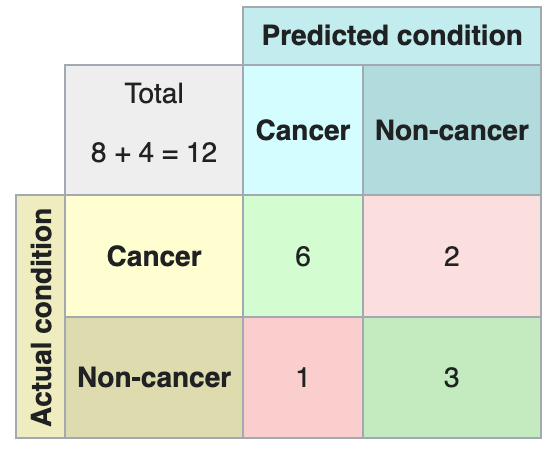

The provided image is an example of a confusion matrix for binary classification (C = 2), but you can easily imagine this scaling up to C > 2.

From this confusion matrix we can get all sorts of useful metrics such as False Positive Rate (FPR), False Negative Rate (FNR), Recall, Precision, etc... If you are interested in learning more about confusion matrix and related metrics [this wikipedia page](https://en.wikipedia.org/wiki/Confusion_matrix#cite_note-11) is a good place to look at. 







### 2.4.1 Create a confusion matrix (6 points)

For the test dataset using the CNN model you have trained above, create a confusion matrix. Please save the confusion matrix as a pandas dataframe called `confusion_matrix_df`.

In [41]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
# TODO

confusion_matrix_df = pd.DataFrame(np.zeros((10, 10)))
all_label = torch.tensor([]).to(device)
all_preds = torch.tensor([]).to(device)
with torch.no_grad():
  for images, labels in test_loader:
      labels = labels.type(torch.LongTensor) # Cast to Float
      images, labels = images.to(device), labels.to(device)
      # TODO
      outputs = cnn(images) # shape: torch.Size([10000, 10])
      _, predicted = torch.max(outputs.data, 1) # use max to get the prediction
      all_label = torch.cat((all_label, labels), dim=0)
      all_preds = torch.cat((all_preds, predicted), dim=0)
     

print(all_label)

confusion_matrix_df = pd.DataFrame(confusion_matrix(all_label.cpu(), all_preds.cpu()))

confusion_matrix_df = confusion_matrix_df.astype('float')

# END TODO
confusion_matrix_df

tensor([9., 9., 9.,  ..., 3., 7., 3.], device='cuda:0')


,0,1,2,3,4,5,6,7,8,9
0,773.0,11.0,69.0,12.0,23.0,7.0,12.0,20.0,41.0,32.0
1,30.0,741.0,20.0,15.0,5.0,9.0,10.0,16.0,20.0,134.0
2,66.0,9.0,566.0,53.0,116.0,76.0,41.0,62.0,7.0,4.0
3,26.0,11.0,93.0,378.0,80.0,208.0,68.0,103.0,9.0,24.0
4,24.0,1.0,96.0,35.0,654.0,44.0,44.0,89.0,8.0,5.0
5,18.0,7.0,67.0,118.0,65.0,593.0,24.0,89.0,9.0,10.0
6,7.0,9.0,72.0,42.0,103.0,40.0,695.0,25.0,4.0,3.0
7,17.0,6.0,39.0,21.0,61.0,64.0,5.0,772.0,4.0,11.0
8,129.0,52.0,31.0,10.0,16.0,9.0,10.0,7.0,700.0,36.0
9,54.0,85.0,21.0,10.0,4.0,17.0,6.0,37.0,26.0,740.0


In [42]:
#Grader Cell (6 points)
grader.grade('check_confusion_matrix', (str(type(confusion_matrix_df)), confusion_matrix_df.shape, confusion_matrix_df.to_numpy().sum()))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.4.2 Visualizing Confusion Matrix (4 points - Manual Grading)
Implement the code to visualize the confusion matrix you have created above. This section will be manually graded

Suggested library is using Seaborn heatmap. Take a look at the parameter "annot"

Text(0.5, 1.0, 'Accuracy Score: 66.120')

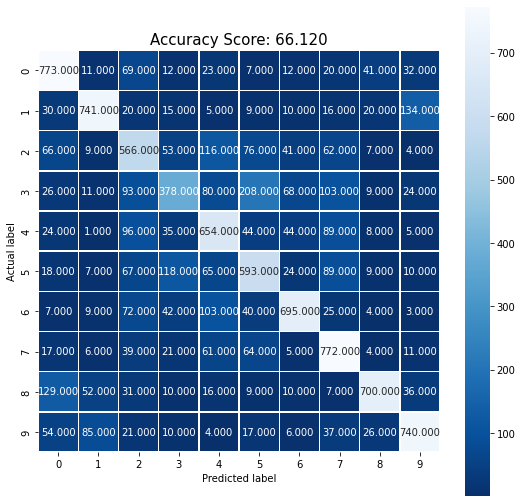

In [43]:
# TODO

plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix_df , annot=True, fmt=".3f", linewidth=.5, square=True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.3f}'.format(test_acc_CNN)
plt.title(all_sample_title, size = 15)

# END TODO

# Homework Submission

Well done! You have finished the homework :) The submission instructions are as follows:

* **Double check** that you have the correct PennID (all numbers) in the autograder. 

* **Triple check** that you have all plots shown in this Colab notebook before submitting (otherwise, your submission will be subjected to a **penalty of -5 points**).

*  Go to the "File" tab at the top left of the Colab UI, click "Download .ipynb" and then "Download .py".  **Rename** these two files to `homework5.ipynb` and `homework5.py` respectively and upload them to Gradescope.
  - <ins>**WAIT UNTIL THE GRADESCOPE AUTOGRADER FINISHES RUNNING!**</ins> If we have to manually upload this for you after the deadline, **we will apply a penalty of -5 points** (this stacks with any other penatlies)

* You must submit your notebook to receive credit. Post any issues with submission on Ed and make sure to keep in mind the late day policy.

* After you submit your code, the teaching staff will manually grade your Colab notebook in order to validate the correctness of your code.